In [19]:
%reload_ext autoreload
%autoreload 2

from analyze import mult_sim_analysis
from constants import out_file_path
from si_types import OutputParameters

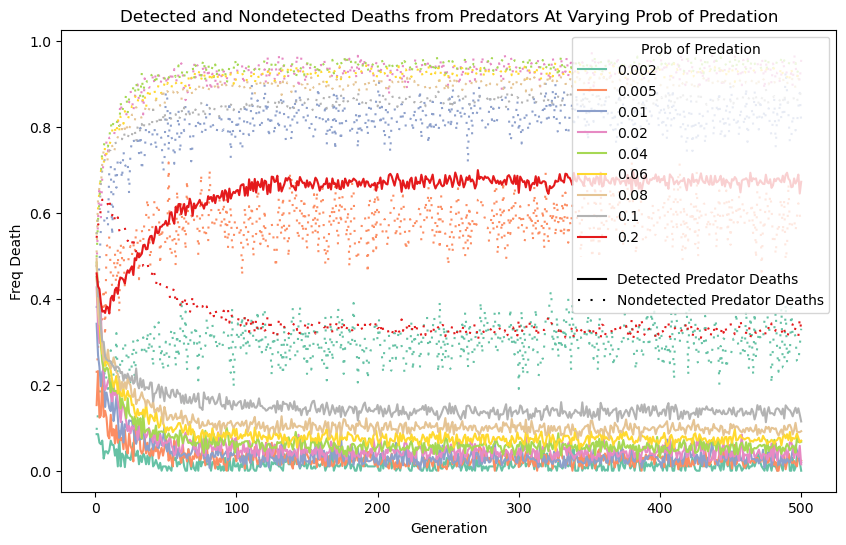

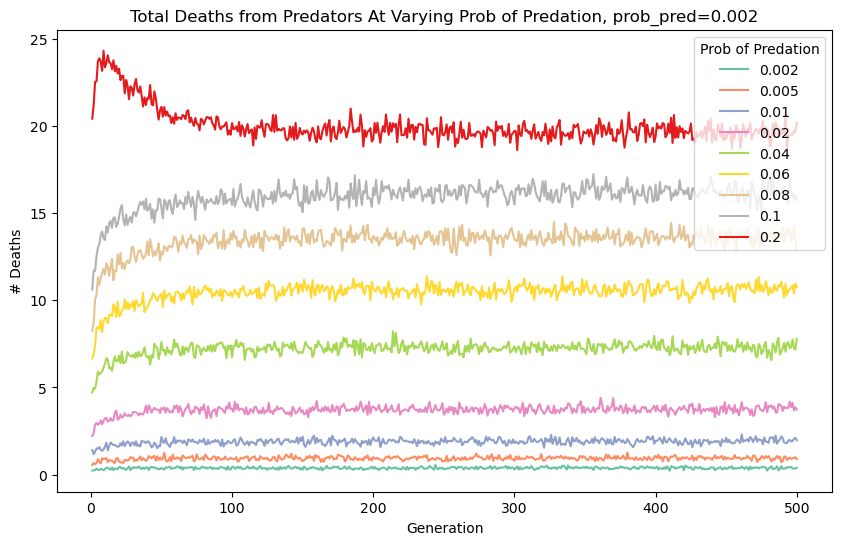

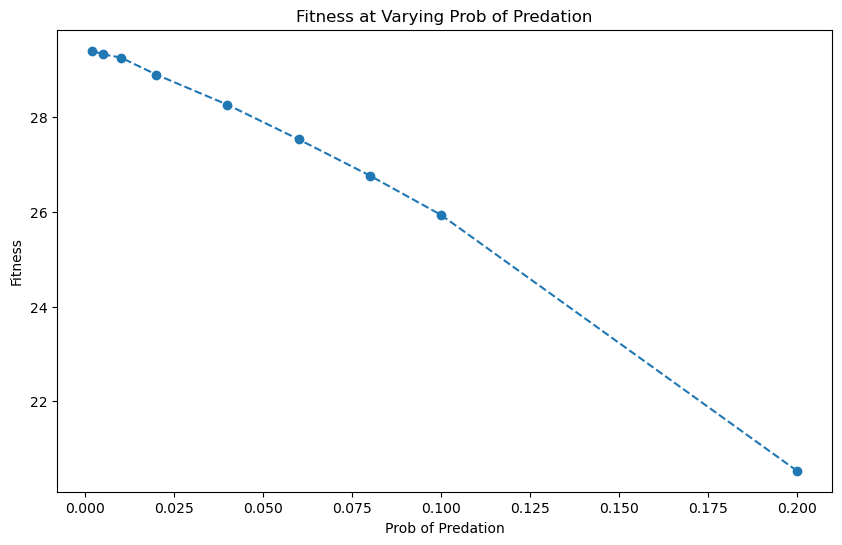

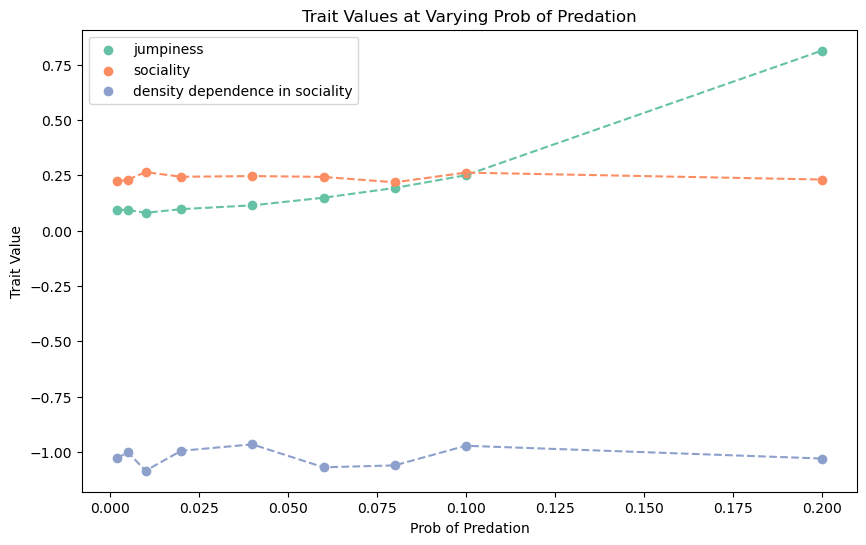

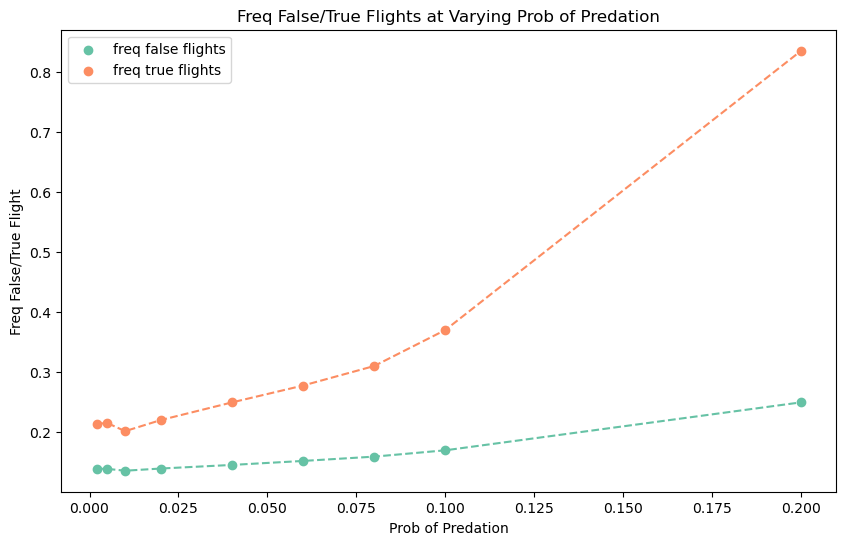

In [20]:
params = []
param=""

# for max_group_size in [15, 25, 50]:
#   for Ni in [100, 500]:
#     param="avg_group_size" 
#     params.append(OutputParameters(prob_pred=0.2, max_group_size=max_group_size, Ni=Ni, group_bin_size=int(max_group_size/5), cap_num_deaths=True))

for prob_pred in [0.002, 0.005, 0.01, 0.02, 0.04, 0.06, 0.08, 0.1, 0.2]:
  param="prob_pred"
  params.append(OutputParameters(prob_pred=prob_pred, cap_num_deaths=True))

# for e_gain in [0.5, 1, 1.5, 2]:
#   params.append([])
#   for prob_pred in [0.02, 0.06, 0.08, 0.1, 0.2]:
#     param="prob_pred"
#     params[-1].append(OutputParameters(prob_pred=prob_pred, e_gain=e_gain, cap_num_deaths=True))


# for param_set in params:
mult_sim_analysis(
  out_file_path=out_file_path,
  all_params=params,
  plots=[
    # "flight_freq_by_group_size",
    # "fitness",
    # "all_mean_trait_values",
    # "avg_flight",
    "detected_nondetected_pred_deaths",
    "total_deaths_per_gen",
    "final_fitness",
    "final_trait_values",
    "final_flight_freq"
  ],
  param=param,
)
